In [61]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.gaussian_process.kernels import RBF, Matern
from sklearn.neural_network import MLPRegressor

In [57]:
# Create a dataset
N = 100
X = np.random.random((N, 2)) * 6 - 3 # uniformly distributed between (-3, +3)
Y = np.sin(2*X[:,0]) + np.cos(3*X[:,1])

$$ y = \sin(2x_1) + \cos(3x_2) $$

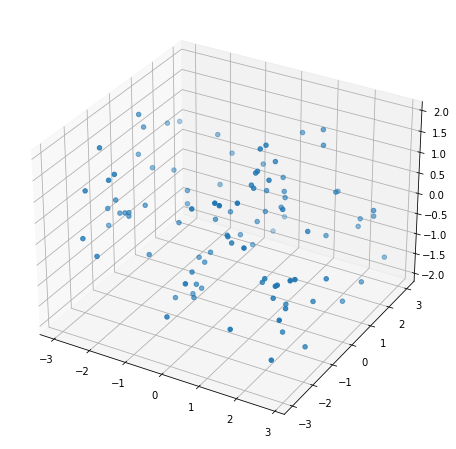

In [58]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y);

In [4]:
lr = LinearRegression()
lr.fit(X,Y)
lr.coef_

array([-0.19364139, -0.05304898])

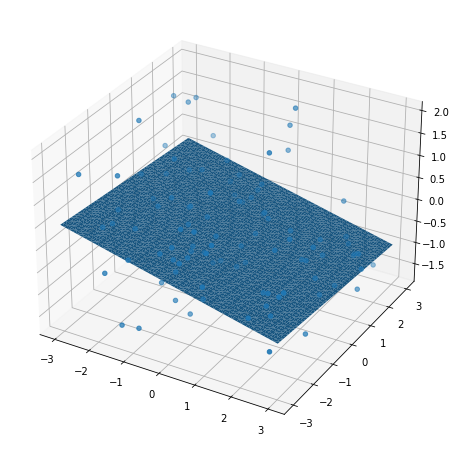

In [5]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# Prediction Surface
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = lr.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True);

In [6]:
ridge = linear_model.Ridge(alpha=.5)
ridge.fit(X, Y)
ridge.coef_

array([-0.19330771, -0.0529747 ])

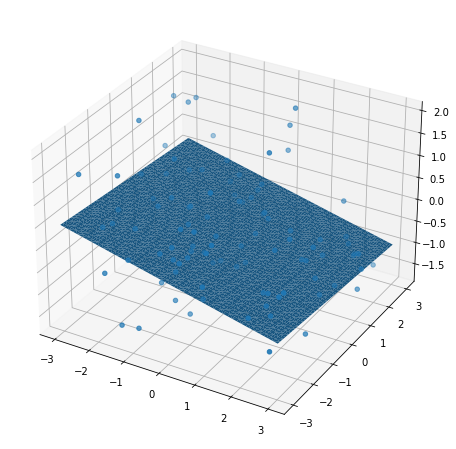

In [7]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# Prediction Surface
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = ridge.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)

In [72]:
gpr = GaussianProcessRegressor(kernel = RBF(1, length_scale_bounds="fixed"))
gpr.fit(X,Y)

GaussianProcessRegressor(kernel=RBF(length_scale=1))

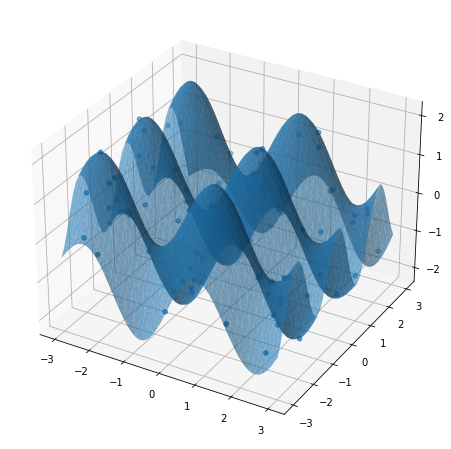

In [73]:
fig = plt.figure(figsize=(20, 8))
#ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# Prediction Surface
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
mean_prediction,std_prediction = gpr.predict(Xgrid, return_std=True)
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], mean_prediction, linewidth=0.1, antialiased=True).set_alpha(0.6)
#ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], mean_prediction + 1.96 * std_prediction, linewidth=0.1, antialiased=True).set_alpha(0.4)
#ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], mean_prediction - 1.96 * std_prediction, linewidth=0.1, antialiased=True).set_alpha(0.2)

In [10]:
# See: https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy_targets.html
X_gpr = np.linspace(start=0, stop=10, num=1_000).reshape(-1, 1)
y_gpr = np.squeeze(X_gpr * np.sin(X_gpr))

In [11]:
rng = np.random.RandomState(1)
training_indices = rng.choice(np.arange(y_gpr.size), size=6, replace=False)
X_train, y_train = X_gpr[training_indices], y_gpr[training_indices]

In [12]:
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(X_train, y_train)
gaussian_process.kernel_

5.02**2 * RBF(length_scale=1.43)

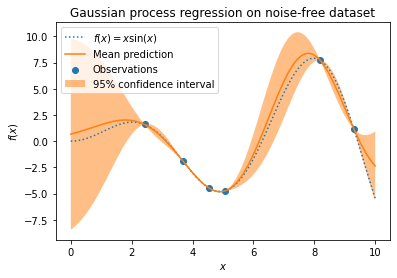

In [13]:
mean_prediction, std_prediction = gaussian_process.predict(X_gpr, return_std=True)

plt.plot(X_gpr, y_gpr, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.scatter(X_train, y_train, label="Observations")
plt.plot(X_gpr, mean_prediction, label="Mean prediction")
plt.fill_between(
    X_gpr.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression on noise-free dataset")

In [23]:
rf = RandomForestRegressor()
rf.fit(X, Y)

RandomForestRegressor()

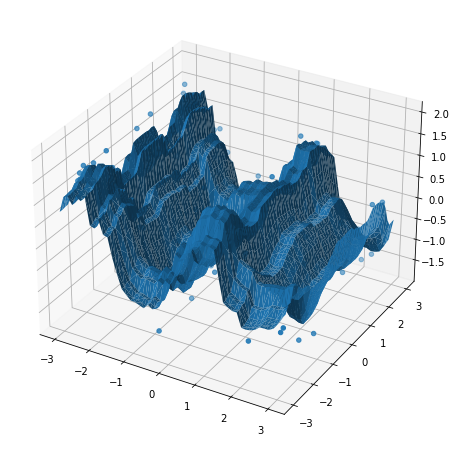

In [26]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# Prediction Surface
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = rf.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True);

In [59]:
mlp = MLPRegressor(hidden_layer_sizes=128, alpha=0., learning_rate_init=0.01)
mlp.fit(X, Y);

C:\Users\atace\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


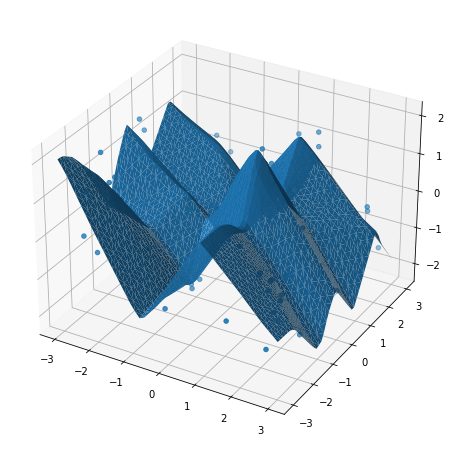

In [60]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# Prediction Surface
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = mlp.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True);